## 2-5. 고급 추정법


#### 1. 기대값 최대화 알고리즘(Expectation Maximization Algorithm)
- 잠재 변수가 포함된 확률 모델에서 모수를 추정하기 위한 방법
- Ex) 가우시안 혼합 분포 모델(Gaussian Mixture Model)


#### 문제 모델링

- 1. 기대값 단계(Expectation, E step)

관측값(X)와 θ 일 때의 잠재 변수 분포에서, 완전 로그 우도 함수 의 기대값을 계산

▷ $𝑄(𝜃'|𝜃)=𝐸_{𝑍|𝑋,𝜃}[log𝑃(𝑋,𝑍|𝜃')]$

- 2. 최대화 단계(Maximization, M step): 𝑄(𝜃′|𝜃) 를 최대화하는 θ’ 유도

$\theta'=argmax_{\theta'}𝑄(\theta'|\theta)$

#### 알고리즘 수행
> 1. 모수(θ) 초기화
> 2. 계산
> 3. 를 업데이트
> 4. 종료 조건을 만족할 때까지, 2 부터 반복

▷ 문제에 따라 전역 최적해를 보장하지는 않음

#### 가우시안 혼합 분포 모델(Gaussian Mixture Model)
$X={x_1, x_2,…,x_𝑁}$

- 잠재 변수
> $Z={𝑧_1, 𝑧_2,…,𝑧_𝑁}$, $z_i\in {1, ..., C}$

$𝑄(\theta'|\theta)=E_{Z|X,\theta}[log𝑃(X,Z|\theta')]$

$=\sum_{𝑖=1}^𝐶𝑓(Z=i|X,\theta)[logf(X,Z=i|\theta')]$

$x_i$가 서로 독립이라면

$\sum_{j=1}^𝑁\sum_{i=1}^𝐶f(Z_𝑗=i|X=x_j,\theta)[log f(X=x_j,Z_𝑗=i|\theta')]$


#### Expectation Step

$𝑓(𝑍_𝑗=𝑖|𝑋=𝑥_𝑗,\theta)=\frac{𝑓(𝑍_𝑗=𝑖,𝑋=𝑥_j|\theta)}{𝑓(𝑋=𝑥_𝑗|𝜃)}$

$=\frac{𝑓(𝑋=𝑥_𝑗|𝑍_𝑗=𝑖,\theta)𝑃(𝑍_𝑗=𝑖|𝜃)}{\sum_{𝑘=1}^𝐶𝑓(𝑋=𝑥_𝑗|𝑍_𝑗=𝑘,\theta)P(𝑍_𝑗=𝑘|\theta)}$

- Gaussian Mixture Model의 모수 $\theta$의 구성

> $𝑃(𝑍_𝑗=𝑖)=\tau_𝑖$
>
> $𝑋=𝑥_𝑗|𝑍_𝑗=𝑖 \sim 𝑁(\mu_𝑖,\sigma_𝑖^2)$

$𝑓(𝑍_𝑗=𝑖|𝑋=𝑥_𝑗,𝜃)=\tau_{𝑗𝑖}=\frac{\frac{1}{\sqrt{2\pi\sigma_i^2}}𝑒𝑥𝑝\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖}{\sigma_i})^2\right)\tau_i}{\sum_{k=1}^C\frac{1}{\sqrt{2\pi\sigma_k^2}}𝑒𝑥𝑝\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k}{\sigma_k})^2\right)\tau_k}$

$𝑓(𝑋=𝑥_𝑗, 𝑍_𝑗=𝑖|\theta') = log(f(X=x_j|Z_j=i, \theta')P(Z_j=i|\theta'))$

$=log f(X=x_j|Z_j=i,\theta')+log P(Z_j=i|\theta')$

> $𝑃(𝑍_𝑗=𝑖)=\tau_𝑖'$
>
> $𝑋=𝑥_𝑗|𝑍_𝑗=𝑖 \sim 𝑁(\mu_𝑖',\sigma_𝑖'^2)$

$= log \frac{1}{\sqrt{2\pi\sigma_i'^2}}𝑒𝑥𝑝\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖}{\sigma_i})^2\right) + log\tau_i'$

$=-\frac{log 2\pi}{2} - log \sigma_i'−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖}{\sigma_i})^2 + log \tau_i'$

#### Maximization Step

$Q(\theta'|\theta)=\sum_{j=1}^N\sum_{i=1}^C \tau_{ji}\left(-\frac{log 2\pi}{2} - log \sigma_i'−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖'}{\sigma_i})^2 + log \tau_i'\right)$

을 최대화하는 $\tau'_k, \mu_k', \sigma_k'^2$ 유도

- $\tau'_k$

$\tau_k'=argmax_{\tau_i'} \sum_{j=1}^N\sum_{i=1}^C \tau_{ji}\left(-\frac{log 2\pi}{2} - log \sigma_i'−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖'}{\sigma_i})^2 + log \tau_i'\right)$

$=argmax_{\tau_i'} \sum_{j=1}^N\sum_{i=1}^C\tau_{ji}log\tau_i'$

$=argmax_{\tau_i'} \sum_{j=1}^N\tau_{ji}log\tau_i'$, where $\sum_{i=1}^C\tau_i'=1$

- 라그랑주 승수법,

> $𝐿(𝜏_𝑖',𝜆)=\sum_{𝑗=1}^𝑁\tau_{𝑗𝑘}𝑙𝑜𝑔\tau_𝑘'+𝜆(1−\sum_{𝑖=1}^𝐶\tau_𝑖')$
>
> $\frac{\partial𝐿}{\partial\tau_𝑘'}=\frac{\sum_{𝑗=1}^𝑁\tau_{𝑗𝑘}}{\tau_𝑘'}−\lambda=0$, $\tau_k'=\frac{\sum_{j=1}^N\tau_{jk}}{\lambda}$

제약식에 대입

> $\lambda=n, \tau_k'=\frac{1}{n}\sum_{j=1}^N \tau_{jk}$



- $\mu'_k$

$\mu_k'=argmax_{\mu_k'} \sum_{j=1}^N\sum_{i=1}^C \tau_{ji}\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖'}{\sigma_i})^2\right)$

$=argmax_{\mu_k'} \sum_{j=1}^N \tau_{jk}\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k'}{\sigma_i})^2\right)$

$Q_{\mu_k'}=\sum_{j=1}^N \tau_{jk}\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k'}{\sigma_k})^2\right)$

$\frac{\partial Q_{\mu_k'}}{\partial\mu'_k}=\sum_{j=1}^N \tau_{jk}(\frac{𝑥_𝑗−\mu_k'}{\sigma_k}) = 0$

$\mu_k'=\frac{\sum_{j=1}^N\tau_{jk}x_j}{\sum_{j=1}^N\tau_{jk}}$


- $\sigma'_k$

$\sigma_k'=argmax_{\sigma_k'} \sum_{j=1}^N \tau_{ji}\left(-log \sigma_i'−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k'}{\sigma_i'})^2\right)$

$Q_{\sigma_k'}=\sum_{j=1}^N \tau_{jk}\left(-log \sigma_k'−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k'}{\sigma_k'})^2\right)$

$\frac{\partial Q_{\mu_k'}}{\partial\mu'_k}=\sum_{j=1}^N \tau_{jk}\left(-\frac{1}{\sigma_k'}+\frac{(𝑥_𝑗−\mu_k')^2}{\sigma_k'^3}\right) = 0$

$\sigma_k'=\frac{\sum_{j=1}^N\tau_{jk}(x_j - \mu_k')^2}{\sum_{j=1}^N\tau_{jk}}$

1. 모수(θ) 초기화:  $\tau, \mu, \sigma$

2. $X, \theta$로 $\theta'$ 계산

> $\tau_{𝑗𝑖}=\frac{\frac{1}{\sqrt{2\pi\sigma_i^2}}𝑒𝑥𝑝\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_𝑖}{\sigma_i})^2\right)\tau_i}{\sum_{k=1}^C\frac{1}{\sqrt{2\pi\sigma_k^2}}𝑒𝑥𝑝\left(−\frac{1}{2}(\frac{𝑥_𝑗−\mu_k}{\sigma_k})^2\right)\tau_k}$
>
> $\tau_k'=\frac{1}{n}\sum_{j=1}^N \tau_{jk}$
>
> $\mu_k'=\frac{\sum_{j=1}^N\tau_{jk}x_j}{\sum_{j=1}^N\tau_{jk}}$
>
> $\sigma_k'=\frac{\sum_{j=1}^N\tau_{jk}(x_j - \mu_k')^2}{\sum_{j=1}^N\tau_{jk}}$

3. $\theta$를 $\theta'$으로 업데이트

> $\tau=\tau', \mu=\mu', \sigma=\sigma'$

4. 종료 조건을 만족할 때까지, 2부터 반복

### 2. 마르코프 체인 몬테카를로(MCMC) 추정

#### 마르코프 체인 몬테카를로 추정 (Markov Chain Monte-Carlo Estimation, MCMC)
- 확률적 시뮬레이션 방법을 통한 추정 방법
- 마르코프 체인(Markov Chain) + 몬테카를로 방법(Monte Carlo Method)

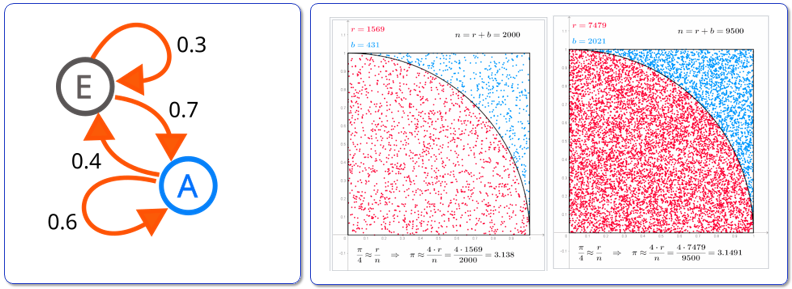

출처: https://en.wikipedia.org/wiki/Markov_chain, https://en.wikipedia.org/wiki/Monte_Carlo_method

### Slide 13: (Untitled)

#### 몬테카를로 방법
- 확률적으로 샘플을 생성하여 전체 분포나 값의 특성을 추정

#### 기본 절차
- 1. 문제를 확률적으로 모델링
- 2. 시뮬레이션
> 2-1. 정의한 확률에 따른 표본 추출
> 
> 2-2. 추출한 변수로 추정
> 
> 2-3. 충분한 표본 수가 확보될 때까지 2-1 부터 반복
- 예)
$\int_𝑎^𝑏𝑓(𝑥)𝑑𝑥 \approx (𝑏−𝑎)\frac{\sum_{𝑖−1}^𝑁𝑓(𝑥_𝑖)}{𝑁}𝑥_𝑖 \sim 𝑈𝑛𝑖𝑓𝑜𝑟𝑚(𝑎,𝑏)$

#### 마르코프 체인
- 순차적으로 변하는 상태를 나타내는 확률 모델
> 상태 공간(State Space): 가능한 상태들의 집합

| 날씨 예측 | 맑음, 흐림, 비 |
| --- | --- |
| 고객 행동 | 방문, 장바구니, 구매 |
| 문장 생성 | 단어 1, 단어 2, 단어 3 |
| 신용 등급 | AAA, AA, A, BBB, BB, default |


#### 마르코프 체인

- 과거 독립성: 현재 상태는 오직 직전의 상태에만 의존

$𝑃(𝑋_{𝑡+1}=𝑥_{𝑡+1}|𝑋_𝑡=𝑥_𝑡,𝑋_{𝑡−1}=𝑥_{𝑡−1},…,𝑋_0=𝑥_0)=𝑃(𝑋_{𝑡+1}=𝑗|𝑋_𝑡=𝑖)$

- 전이 확률: 상태 i 에서 상태 j 로 이동할 확률

$𝑝_{𝑖𝑗}=𝑃(𝑋_{𝑡+1}=𝑗|𝑋_𝑡=𝑖)$

- 전이 행렬: 상태별 전이 확률을 모은 행렬

$𝑃 = \begin{bmatrix}
𝑝_{11} & \cdots & 𝑝_{1𝑛} \\
\vdots & \ddots & \vdots \\
𝑝_{𝑛1} & \cdots & 𝑝_{𝑛𝑛}
\end{bmatrix}$

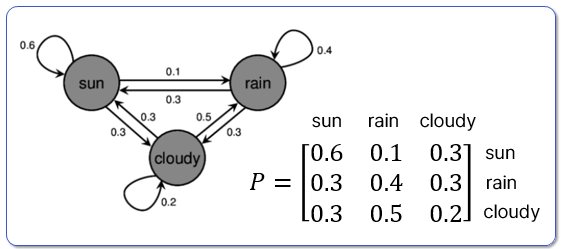

- 상태 확률: t 시점에서 상태의 확률 분포

$\pi^{(t)} = 
\begin{bmatrix}
\pi_1^{(t)} & \pi_2^{(t)} & \cdots & \pi_n^{(t)}
\end{bmatrix}$

$\pi^{(t+1)}=\pi^{t}P$

$\pi^{(0)} = 
\begin{bmatrix}
0.5 & 0.3 & 0.2
\end{bmatrix}$

$\pi^{(1)}=\pi^{0}P$

$=\begin{bmatrix} 0.5 & 0.3 & 0.2 \end{bmatrix}
\begin{bmatrix} 
0.6 & 0.1 & 0.3 \\
0.3 & 0.4 & 0.3 \\
0.3 & 0.5 & 0.2
\end{bmatrix}$

= $\pi^{(0)} = 
\begin{bmatrix}
0.45 & 0.27 & 0.286
\end{bmatrix}$

- 정상분포(Stationary Distribution): 마르코프 체인이 수렴했을 때 분포

> $\pi^{(1)}=\pi^{0}P$
>
> $\pi^{(2)}=\pi^{1}P$
> 
>...
> 
>$\pi=\pi P$

#### 메트로폴리스-헤이스팅스 알고리즘(Metropolis-Hastings Algorithm)
- 확률분포 𝜋(𝑥)를 직접 구하기 어렵지만, 비례식을 통한 샘플링으로 분포를 근사화
> 𝑃(𝑥): 대상 분포(추론하고자 하는 분포)
> 
> 마르코프 과정에서 정상 분포 𝜋(𝑥) 가 𝑃(𝑥) 가 되도록 유도
- 이를 위한 두 가지 조건
> 1. 정상 분포의 존재 조건: 상세 균형(detailed balance)
>
>    $\pi(𝑥)𝑃(𝑥'|𝑥)=𝜋(𝑥')𝑃(𝑥|𝑥')$
> 
> 2. 정상 분포의 유일성: 에르고딕(ergodic)
>    
>    Aperiodic: 비주기성
>  
>    Positive recurrent: 유한 단계의 상태 복귀


- 상세 균형(detailed balance)에서, 𝜋(𝑥)를 𝑃(𝑥)로 설정

전이 확률 $P(x'|x)$를 제안 분포(Proposal distribution) 와 수락 분포(Acceptance distribution)로 분리

$𝑃(𝑥)𝑃(𝑥′|𝑥)=𝑃(𝑥′)𝑃(𝑥|𝑥′)$

$\frac{𝑃(𝑥'|𝑥)}{𝑃(𝑥|𝑥')}=\frac{𝑃(𝑥')}{𝑃(𝑥)}$

$𝑃(𝑥'|𝑥)=𝑔(𝑥'|𝑥)𝐴(𝑥→𝑥′)$

$\frac{𝑔(𝑥'|𝑥)𝐴(𝑥→𝑥′)}{𝑔(𝑥|𝑥')𝐴(𝑥′→𝑥)}=\frac{𝑃(𝑥')}{𝑃(𝑥)}$

$\frac{𝐴(𝑥→𝑥')}{𝐴(𝑥'→𝑥)}=\frac{𝑃(𝑥')𝑔(𝑥|𝑥')}{𝑃(𝑥)𝑔(𝑥'|𝑥)}$

에르고딕 성질을 만족시키는 $𝐴(𝑥→𝑥')$

$𝐴(𝑥→𝑥')=min(⁡1,\frac{𝑃(𝑥')𝑔(𝑥|𝑥')}{𝑃(𝑥)𝑔(𝑥′|𝑥)})$

#### 알고리즘

- 1. 초기화: t = 0, 초기 설정
- 2. 반복

> 1) $x' \sim g(x'|x_t)$ 생성
> 2) $A(x', x_t) = min(⁡1,\frac{𝑃(𝑥')𝑔(𝑥|𝑥')}{𝑃(𝑥)𝑔(𝑥′|𝑥)})$
> 3) 수락 (Accept) or 거절 (Reject)
>    
>    ① $u \sim Uniform(0, 1)$ 생성
> 
>    ② if $u \le A(x', x_t), x_{t+1} = x'$
> 
>    ② if $u > A(x', x_t), x_{t+1} = x_t$

- 3. 후처리
> 1) Burn-in: 정상 분포 수렴 전의 샘플 제거
>
> 2) Thinning: 샘플 간 의존 제거
>    ESS 계산: 독립적 샘플 추정
>
>    $ESS = \frac{N}{1 + 2 sum_k rho_k} , N: 총 샘플수, $\rho_k$: k-lag의 자기상관 계수

#### 베이지언 추론(Bayesian inference)

- 사전 정보(𝑃(𝜃), Prior)와 관측 데이터(X)를 결합하여, 사전 정보(𝑃(𝜃), Prior)를 사후 정보(𝑃(𝜃│𝑋), Posterior)로 업데이트하는 추론법
> $𝑃(\theta|𝑋)=\frac{𝑃(𝑋|\theta)⋅𝑃(\theta)}{𝑃(𝑋)}$


- Ex) 붓꽃(Iris) 직경의 사후 분포의 모수 추정

> 붓꽃의 사전 분포: $𝑋 \sim 𝑁10,22$

> 실제는 $𝑵(𝟏𝟏, 𝟐^𝟐)$에서의 샘플

```
X={11.9, 10.5, 12.1, 14.1, 9.5, 9.5, 14.1, 12.2, 9.9, 12.2,
   9.2, 9.2, 12.4, 11.7, 8.7, 9.4, 11.5, 12.9, 10.5, 9.1}
'''


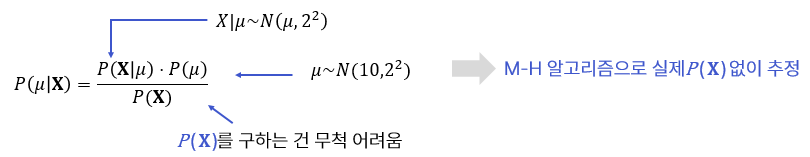

> 제안 분포의 유도

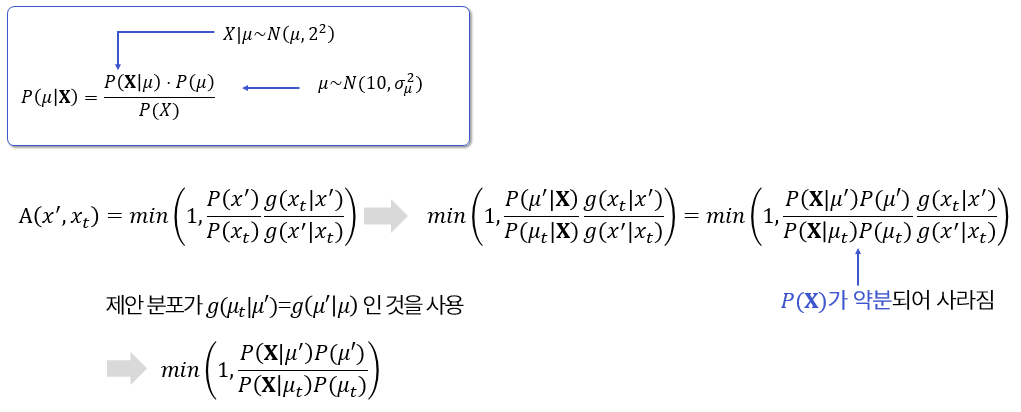